In [1]:
from scipy.io import loadmat
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
gt_mask_path = '/Users/akre96/Data/BE_223B/MoNuSeg_Test_Set/ground_truth_masks'
pred_mask_path = '/Users/akre96/Data/BE_223B/MoNuSeg_Test_Set/predicted_masks'
out_path = '/Users/akre96/Data/BE_223B/MoNuSeg_Test_Set/ground_truth_centroids'
pred_out_path = '/Users/akre96/Data/BE_223B/MoNuSeg_Test_Set/predicted_centroids'
gt_files = [os.path.join(gt_mask_path, file) for file in os.listdir(gt_mask_path) if file.split('.')[1] == 'mat']
pred_files = [os.path.join(pred_mask_path, file) for file in os.listdir(pred_mask_path) if file.split('.')[1] == 'mat']

In [3]:
def centeroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length

In [6]:
## Ground Truth
for file in gt_files:
    gt_mask = loadmat(file)['binary_m']
    n_nuclei = np.unique(gt_mask).shape[0]
    centroids = np.zeros((n_nuclei, 2))
    for val in np.unique(gt_mask):
        indices = np.argwhere(gt_mask == val)
        centroid = np.round(np.mean(indices, axis=0))
        centroids[val-1] = centroid
        
    df = pd.DataFrame(centroids)
    df.columns = ['y', 'x']
    df = df[['x', 'y']]
    out_name = os.path.join(
        out_path,
        file.split('.')[0].split('/')[-1]
            + '_nuc-centroids.csv'
    )
    df.to_csv(out_name, index=False)

In [12]:
## Prediction
for file in pred_files:
    pred_mask = loadmat(file)['predicted_mask']
    n_nuclei = np.unique(pred_mask).shape[0]
    centroids = np.zeros((n_nuclei, 2))
    i=0
    for val in np.unique(pred_mask):
        indices = np.argwhere(pred_mask == val)
        centroid = np.round(np.mean(indices, axis=0))
        centroids[i] = centroid
        i+=1
        
    df = pd.DataFrame(centroids)
    df.columns = ['y', 'x']
    df = df[['x', 'y']]
    out_name = os.path.join(
        pred_out_path,
        file.split('.')[0].split('/')[-1]
            + '-nuc-centroids.csv'
    )
    df.to_csv(out_name, index=False)


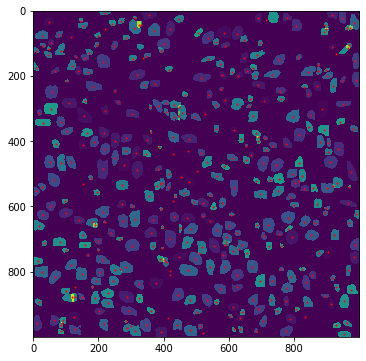

In [11]:

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(pred_mask)
ax.scatter(df['x'], df['y'], s=1, c='red')